In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import matplotlib.pyplot as plt
from pandas.tools.plotting import pandas.plotting.lag_plot
from pandas.tools.plotting import autocorrelation_plot

In [ ]:
dataset = pd.read_csv('Appliances_Energy_Prediction_Dataset.csv',index_col="date",parse_dates=True)

In [ ]:
lag_plot(dataset.iloc[:,0])
plt.show()

In [ ]:
autocorrelation_plot(dataset.iloc[:,0])
plt.show()

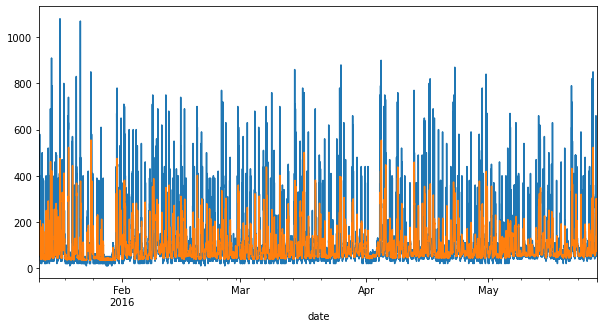

In [ ]:
rolling_mean = dataset.Appliances.rolling(window=10).mean()
dataset.Appliances.plot()
rolling_mean.plot(figsize=(10,5))

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)
X = []
y = []

for i in range(10, dataset_scaled.shape[0]):
    X.append(dataset_scaled[i-10:i, 1:])
    y.append(dataset_scaled[i, 0])
X, y = np.array(X), np.array(y)

X_train = X[:17000]
y_train = y[:17000]
X_test = X[17000:]
y_test = y[17000:]

model = Sequential()
model.add(LSTM(50 , return_sequences = True, input_shape = (X_train.shape[1], 27)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error' , optimizer='adam', metrics=['mae'])
model.fit(X_train, y_train, batch_size=64, epochs=30)
y_train_pred = model.predict(X_train)

Epoch 1/30
266/266 [==============================] - 10s 7ms/step - loss: 0.0093 - mae: 0.0563
Epoch 2/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0087 - mae: 0.0535
Epoch 3/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0083 - mae: 0.0523
Epoch 4/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0082 - mae: 0.0515
Epoch 5/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0080 - mae: 0.0508
Epoch 6/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0078 - mae: 0.0501
Epoch 7/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0077 - mae: 0.0492
Epoch 8/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0075 - mae: 0.0489
Epoch 9/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0074 - mae: 0.0480
Epoch 10/30
266/266 [==============================] - 2s 7ms/step - loss: 0.0073 - mae: 0.0479
Epoch 11/30
266/266 [===========================

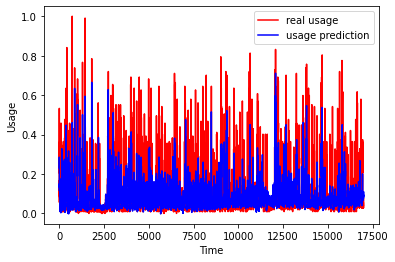

In [ ]:
plt.plot(y_train, color = 'red', label = 'real usage' )
plt.plot(y_train_pred, color = 'blue', label = 'usage prediction')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()

In [ ]:
x_train_1 = dataset_scaled[:17000,1:]
y_train_1 = dataset_scaled[:17000,0]
x_test_1 = dataset_scaled[17000:,1:]
y_test_1 = dataset_scaled[17000:,0]
x_train_1 = x_train_1.reshape((-1,1,27))
x_test_1 = x_test_1.reshape((-1,1,27))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape = (x_train_1.shape[1], 27)))
model.add(Dense(1))

model.compile(loss='mean_squared_error' , optimizer='adam', metrics=['accuracy'])
model.fit(x_train_1, y_train_1, batch_size=16, epochs=20)
usage_predicted = model.predict(x_test_1)

Epoch 1/20
1063/1063 [==============================] - 8s 5ms/step - loss: 0.0088 - accuracy: 5.2941e-04
Epoch 2/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0084 - accuracy: 5.2941e-04
Epoch 3/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0083 - accuracy: 5.2941e-04
Epoch 4/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0081 - accuracy: 5.2941e-04
Epoch 5/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0080 - accuracy: 5.2941e-04
Epoch 6/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0080 - accuracy: 5.2941e-04
Epoch 7/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0079 - accuracy: 5.2941e-04
Epoch 8/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0079 - accuracy: 5.2941e-04
Epoch 9/20
1063/1063 [==============================] - 5s 5ms/step - loss: 0.0078 - accuracy: 5.2941e-04
Epoch 10/20
1063/1063 [=======================

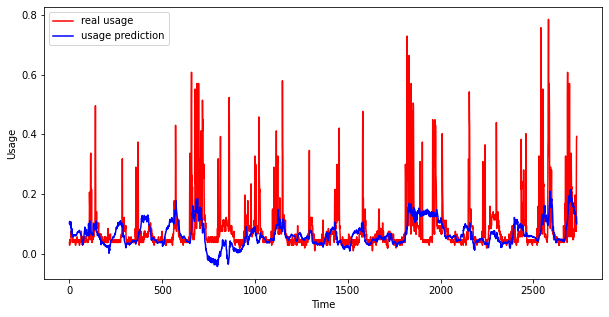

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_1, color = 'red', label = 'real usage' )
plt.plot(usage_predicted, color = 'blue', label = 'usage prediction')
#plt.plot(rolling_mean,color='yellow') transformed
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()